In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Source image

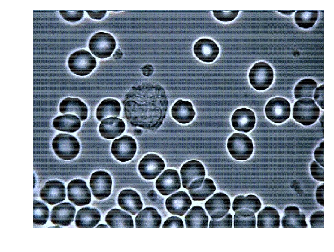

In [2]:
img = cv2.imread('images/1.jpg')
plt.axis('off')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# Blurring  

## 1. Blur (averaging)

This is done by convolving image with a normalized box filter. It simply takes the average of all the pixels under kernel area and replace the central element.

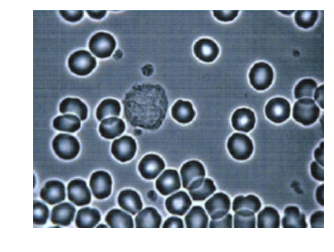

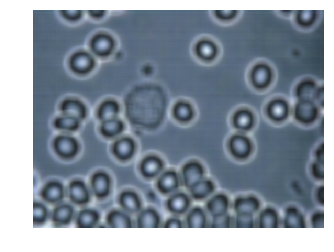

In [3]:
blur = cv2.blur(img, (7,7))
plt.axis('off')
plt.imshow(cv2.cvtColor(blur, cv2.COLOR_BGR2RGB))
plt.figure()

blur = cv2.blur(img, (21,21))
plt.axis('off')
plt.imshow(cv2.cvtColor(blur, cv2.COLOR_BGR2RGB))
plt.show()

## 2. Gaussian Blurring

In this, instead of box filter, gaussian kernel is used. It is done with the function, `cv2.GaussianBlur()`. We should specify the width and height of kernel which should be positive and odd. We also should specify the standard deviation in X and Y direction, sigmaX and sigmaY respectively. If only sigmaX is specified, sigmaY is taken as same as sigmaX. If both are given as zeros, they are calculated from kernel size. Gaussian blurring is highly effective in removing gaussian noise from the image.

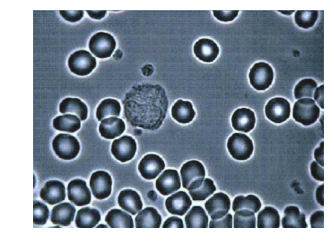

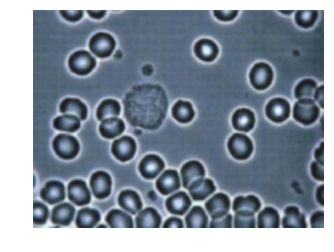

In [4]:
blur = cv2.GaussianBlur(img, (7,7), 0)
plt.axis('off')
plt.imshow(cv2.cvtColor(blur, cv2.COLOR_BGR2RGB))
plt.figure()

blur = cv2.GaussianBlur(img, (21,21), 0)
plt.axis('off')
plt.imshow(cv2.cvtColor(blur, cv2.COLOR_BGR2RGB))
plt.show()

## 3. Median Blurring

Here, the function `cv2.medianBlur()` takes median of all the pixels under kernel area and central element is replaced with this median value. This is highly effective against salt-and-pepper noise in the images. Interesting thing is that, in the above filters, central element is a newly calculated value which may be a pixel value in the image or a new value. But in median blurring, central element is always replaced by some pixel value in the image. It reduces the noise effectively. Its kernel size should be a positive odd integer.

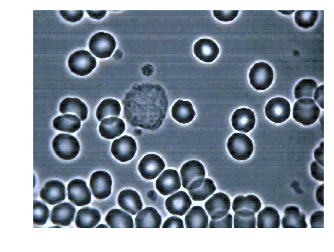

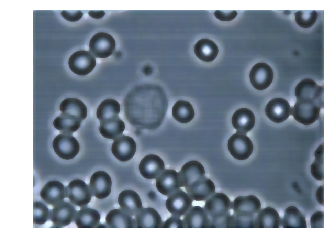

In [5]:
blur = cv2.medianBlur(img, 7)
plt.axis('off')
plt.imshow(cv2.cvtColor(blur, cv2.COLOR_BGR2RGB))
plt.figure()

blur = cv2.medianBlur(img, 21)
plt.axis('off')
plt.imshow(cv2.cvtColor(blur, cv2.COLOR_BGR2RGB))
plt.show()

## 4. Bilateral Filtering

`cv2.bilateralFilter()` is highly effective in noise removal while keeping edges sharp. But the operation is slower compared to other filters. We already saw that gaussian filter takes the a neighbourhood around the pixel and find its gaussian weighted average. This gaussian filter is a function of space alone, that is, nearby pixels are considered while filtering. It doesn’t consider whether pixels have almost same intensity. It doesn’t consider whether pixel is an edge pixel or not. So it blurs the edges also, which we don’t want to do.

Bilateral filter also takes a gaussian filter in space, but one more gaussian filter which is a function of pixel difference. Gaussian function of space make sure only nearby pixels are considered for blurring while gaussian function of intensity difference make sure only those pixels with similar intensity to central pixel is considered for blurring. So it preserves the edges since pixels at edges will have large intensity variation.

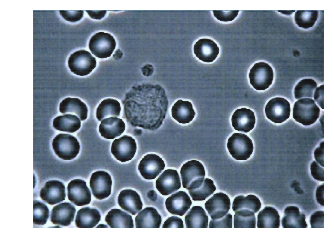

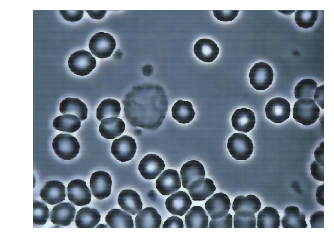

In [6]:
blur = cv2.bilateralFilter(img, 7, 255, 255)
plt.axis('off')
plt.imshow(cv2.cvtColor(blur, cv2.COLOR_BGR2RGB))
plt.figure()

blur = cv2.bilateralFilter(img, 21, 255, 255)
plt.axis('off')
plt.imshow(cv2.cvtColor(blur, cv2.COLOR_BGR2RGB))
plt.show()

## 5. Сombination (median + bilateral)

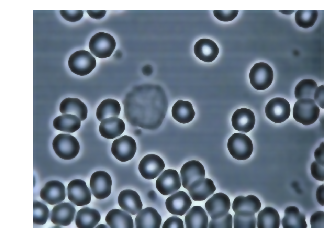

In [7]:
blur = cv2.medianBlur(img, 7)

blur = cv2.bilateralFilter(blur, 21, 255, 255)
plt.axis('off')
plt.imshow(cv2.cvtColor(blur, cv2.COLOR_BGR2RGB))
plt.show()

# Thresholding

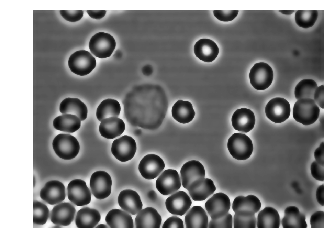

In [8]:
blur = cv2.medianBlur(img, 7)
blur = cv2.bilateralFilter(blur, 21, 255, 255)
grayscale_img = cv2.cvtColor(blur, cv2.COLOR_BGR2GRAY)

plt.axis('off')
plt.imshow(grayscale_img, 'gray')
plt.show()

## 1. Simple Thresholding

If pixel value is greater than a threshold value, it is assigned one value (may be white), else it is assigned another value (may be black). The function used is `cv2.threshold`. First argument is the source image, which should be a grayscale image. Second argument is the threshold value which is used to classify the pixel values. Third argument is the maxVal which represents the value to be given if pixel value is more than (sometimes less than) the threshold value. OpenCV provides different styles of thresholding and it is decided by the fourth parameter of the function. Different types are:

* `cv2.THRESH_BINARY`
* `cv2.THRESH_BINARY_INV`
* `cv2.THRESH_TRUNC`
* `cv2.THRESH_TOZERO`
* `cv2.THRESH_TOZERO_INV`

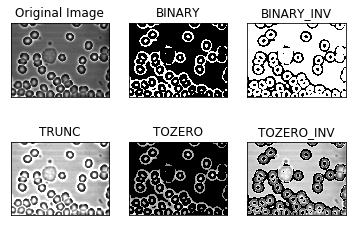

In [9]:
_, thresh1 = cv2.threshold(grayscale_img, 127, 255, cv2.THRESH_BINARY)
_, thresh2 = cv2.threshold(grayscale_img, 127, 255, cv2.THRESH_BINARY_INV)
_, thresh3 = cv2.threshold(grayscale_img, 127, 255, cv2.THRESH_TRUNC)
_, thresh4 = cv2.threshold(grayscale_img, 127, 255, cv2.THRESH_TOZERO)
_, thresh5 = cv2.threshold(grayscale_img, 127, 255, cv2.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [grayscale_img, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range(6):
    plt.subplot(2, 3, i+1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

## 2. Adaptive Thresholding

A global value as threshold value may not be good in all the conditions where image has different lighting conditions in different areas. In that case, we go for adaptive thresholding. In this, the algorithm calculate the threshold for a small regions of the image. So we get different thresholds for different regions of the same image and it gives us better results for images with varying illumination.

It has three ‘special’ input params and only one output argument.

**Adaptive Method**— It decides how thresholding value is calculated:
* `cv2.ADAPTIVE_THRESH_MEAN_C` : threshold value is the mean of neighbourhood area;
* `cv2.ADAPTIVE_THRESH_GAUSSIAN_C` : threshold value is the weighted sum of neighbourhood values where weights are a gaussian window.

**Block Size** — It decides the size of neighbourhood area.

**C** — It is just a constant which is subtracted from the mean or weighted mean calculated.

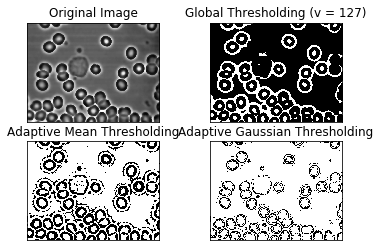

In [10]:
_, th1 = cv2.threshold(grayscale_img, 127, 255, cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(grayscale_img, 255, cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY, 11, 2)
th3 = cv2.adaptiveThreshold(grayscale_img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY, 11, 2)

titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [grayscale_img, th1, th2, th3]

for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
    
plt.show()

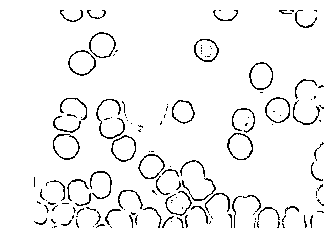

In [11]:
th = cv2.adaptiveThreshold(grayscale_img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY, 11, 5)

plt.axis('off')
plt.imshow(th, 'gray')
plt.show()

## 3. Otsu’s Binarization

In the first section, I told you there is a second parameter `retVal`. Its use comes when we go for Otsu’s Binarization. So what is it?

In global thresholding, we used an arbitrary value for threshold value, right? So, how can we know a value we selected is good or not? Answer is, trial and error method. But consider a bimodal image (In simple words, bimodal image is an image whose histogram has two peaks). For that image, we can approximately take a value in the middle of those peaks as threshold value, right ? That is what Otsu binarization does. So in simple words, it automatically calculates a threshold value from image histogram for a bimodal image. (For images which are not bimodal, binarization won’t be accurate.)

For this, our cv2.threshold() function is used, but pass an extra flag, `cv2.THRESH_OTSU`. For threshold value, simply pass zero. Then the algorithm finds the optimal threshold value and returns you as the second output, retVal. If Otsu thresholding is not used, retVal is same as the threshold value you used.

Check out below example. Input image is a noisy image. In first case, I applied global thresholding for a value of 127. In second case, I applied Otsu’s thresholding directly. In third case, I filtered image with a 5x5 gaussian kernel to remove the noise, then applied Otsu thresholding. See how noise filtering improves the result.

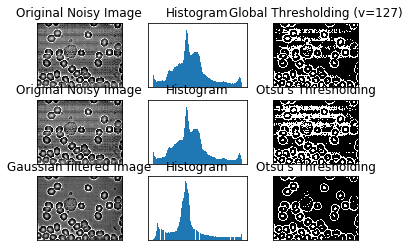

In [12]:
img = cv2.imread('images/1.jpg',0)

# global thresholding
_, th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)

# Otsu's thresholding
_, th2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(img,(5,5),0)
_, th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# plot all the images and their histograms
images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]

for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()

### Only Otsu

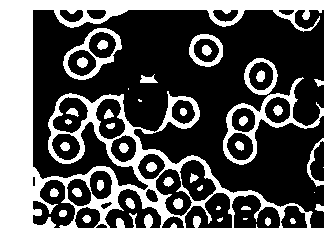

In [13]:
img = cv2.imread('images/1.jpg', 0)

_, th = cv2.threshold(grayscale_img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

plt.axis('off')
plt.imshow(th, 'gray')
plt.show()

### Blur + Grayscale + Otsu

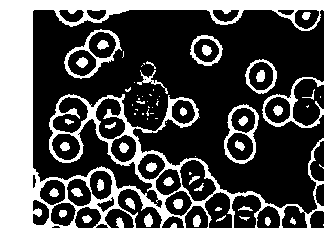

In [14]:
img = cv2.imread('images/1.jpg')

blur = cv2.medianBlur(img, 5)
grayscale_img = cv2.cvtColor(blur, cv2.COLOR_BGR2GRAY)

_, th = cv2.threshold(grayscale_img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

plt.axis('off')
plt.imshow(th, 'gray')
plt.show()

### Grayscale + Blur + Otsu

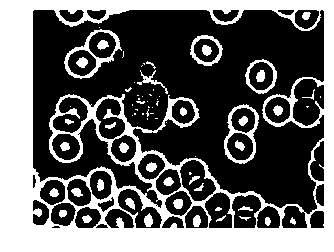

In [15]:
img = cv2.imread('images/1.jpg', 0)

blur = cv2.medianBlur(img, 5)

_, th = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

plt.axis('off')
plt.imshow(th, 'gray')
plt.show()

### Blur combination (median + bilateral)

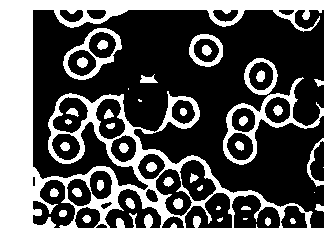

In [16]:
img = cv2.imread('images/1.jpg')

blur = cv2.medianBlur(img, 7)
blur = cv2.bilateralFilter(blur, 21, 255, 255)
grayscale_img = cv2.cvtColor(blur, cv2.COLOR_BGR2GRAY)

_, th = cv2.threshold(grayscale_img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

plt.axis('off')
plt.imshow(th, 'gray')
plt.show()